**Introduction and Key Terms**: 

The wedding industry in the Bay area is a competitive market, with vendors offering services to meet all couples' needs in diverse location for various price. Customer satisfaction is pivotal, but understanding how price influences it requires a nuanced analysis.

Price, defined as "the amount of money given or set as consideration for the sale of a specified thing" (Merriam webster, n.d.), is often seen as an indicator of service quality, yet its relation to customer satisfaction—measured through ratings and reviews in our database —is more complex. The 'Price Range’ in this database varies from 1\\$('inexpensive') to 4\\$('luxury'), as categorized by the Knot.com dollar-sign filtering parameter (TheKnot, n.d.). Customer Satisfaction is "a measurement that determines how happy customers are with a company's products, services, and capabilities"(chen Chen et al., 2019). In this analysis, customer satisfaction  is reflected through ratings and number of reviews. 

**Answering the business question**: 

The analysis reveals a multifaceted connection between price and customer satisfaction within the wedding services sector. While price holds some sway, no clear correlation exists - suggesting that price does not positively affect customer satisfaction. The lack of a linear trend in ratings across price ranges indicates that other factors, such as service quality and regional dynamics, maybe more influential.

In [218]:
#importing all packages 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

#storing the path to the dataset
file = 'wedding.db.xlsx'

#reading the excel file on Python through pandas
wedding_df = pd.read_excel(io = file,
                            # have 2 sheets on my excel : weddings and departments
                          sheet_name = 'weddings') 

#checking results/that the Dataframe is working, only 5 first rows
wedding_df.head(n=5)

,vendor,department,affordability,avg_price,avg_ratings,avg_review_number,num_of_vendors,city,region
0,charlies cheesecake works,cake,inexpensive,1,4.7,780,1,san jose,South Bay
1,cream,cake,inexpensive,1,4.8,642,1,concord,East Bay
2,cake a bakin,cake,inexpensive,1,3.7,94,1,novato,North Bay
3,mitraartcake,cake,affordable,2,4.8,86,1,burlingame,SF Peninsula
4,poore man bakery,cake,affordable,2,4.8,1,1,castro calley,East Bay


In [161]:
#storing the path to the dataset
file = 'wedding.db.xlsx'

#reading the excel file on Python through pandas
wedding_df2 = pd.read_excel(io = file,
                            # Second sheets on my excel : weddings and departments
                          sheet_name = 'departments') 

# Checking that the Sheet 2 of Dataframe is working, only 5 first rows.
wedding_df2.head(n=5)

# Saved this database to have a better overview of the department informations (different averages and vendor number)

,department,avg_price,avg_ratings,avg_num_of_reviews,num_of_vendors
0,wedding planners,2.06,4.96,37.32,50
1,music,2.56,4.94,48.70,50
2,photo and video,1.91,4.94,80.87,46
3,venues,2.55,4.76,45.64,33
4,hair and makeup,2.22,4.71,259.00,41


In [162]:
#Descriptive statistics for main columns.
ds_wed = wedding_df[['avg_price', 'avg_ratings', 'avg_review_number']].describe()

# Calculate mean of wedding_df2, second sheet of the dataset.
# Provides overview of average charcateristic for each department.
departments_mean = wedding_df2.describe().mean()

# Calculate range to see the spread and breadth of the dataset.
# help finding the range and outliers 
wed_range = wedding_df[['avg_price', 'avg_ratings', 'avg_review_number' ]].max() - wedding_df[['avg_price', 'avg_ratings', 'avg_review_number']].min()

print('\nDescriptive Statistics:\n')
print(ds_wed)

print ('\nRange:\n')
print(wed_range)


Descriptive Statistics:

       avg_price  avg_ratings  avg_review_number
count  48.000000    48.000000          48.000000
mean    2.458333     4.625000         170.937500
std     0.682870     0.481354         261.771982
min     1.000000     2.500000           1.000000
25%     2.000000     4.400000          28.750000
50%     2.000000     4.800000          79.000000
75%     3.000000     5.000000         163.500000
max     4.000000     5.000000        1313.000000

Range:

avg_price               3.0
avg_ratings             2.5
avg_review_number    1312.0
dtype: float64


**Price Range :**  
The data show different price ranges among wedding vendors, which go from 1.0 (inexpensive) to 4.0 (luxury), based on theknot.com dollar-sign filter. Vendors usually offer services at a moderate price, with a mean of 2.35, demonstrating a preference for mid-tier pricing and suggesting that affordability is an important factor for customers.

**Customer Satisfaction :**  
Wedding vendors have high customer satisfaction ratings, with an average rating of approximately 4.51, which suggests that couples are usually pleased with the services provided by the vendors in our dataset.  

**Number of Reviews:**  
The number of reviews varies significantly per vendor, with a maximum of 1700 reviews. This range demonstrates that there is a big differences in vendor popularity and customer engagement within the database, which may be due to other factor such as quality service or the location. 


             avg_price  avg_ratings
avg_price     1.000000     0.106803
avg_ratings   0.106803     1.000000


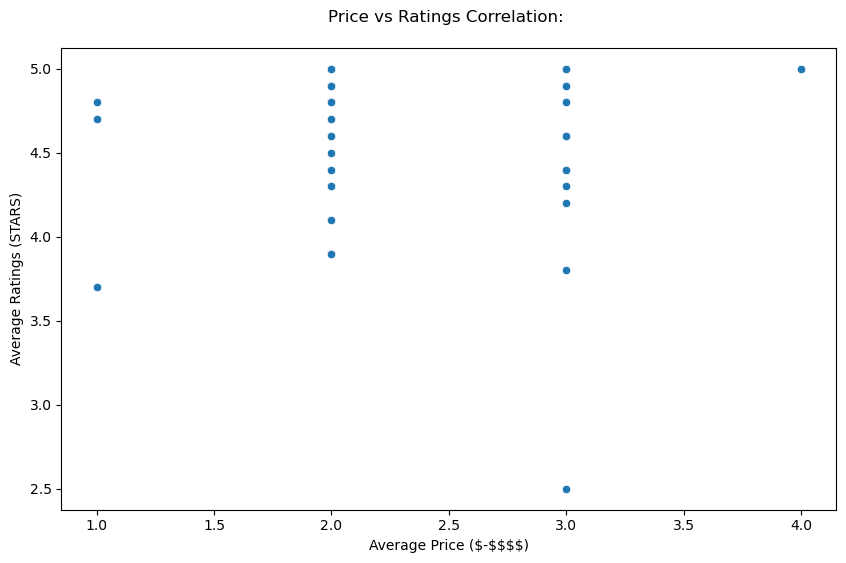

In [182]:
#Figure 1

correlation between average price and average ratings
corr_wedding_df = wedding_df[[ 'avg_price', 'avg_ratings']].corr()

print(corr_wedding_df)

# Set the figure size 
plt.figure(figsize = (10,6))

# instantiating a scatter plot for carat and price
sns.scatterplot(data = wedding_df, 
               x = 'avg_price',
               y = 'avg_ratings')

#formatting the plot(title, axis label)
plt.title       (label  = 'Price vs Ratings Correlation: \n')
plt.xlabel      (xlabel = "Average Price ($-$$$$)"          )
plt.ylabel      (ylabel = 'Average Ratings (STARS)'         )

# displaying the plot
plt.show()
            

When looking at the correlation between price and ratings, no linear trend in the scatter plot were found. Hence indicating that higher prices does not always lead to higher ratings and thus customers satisfaction. The scatter plot suggests that customer satisfaction and ratings in the wedding industry depends on other factor than just price, such as service quality, vendor reputation, and overall customer experiences. 

**Note:** The prices in the database are relative prices: measured in comparison to the price of another product or service. Additionally, vendor prices were categorized into a value system; four 'affordability' category taken from TheKnot.com, a popular website. This categorization and 'pricing' system explains why all prices fall on top of either 1,2,3 or 4). 

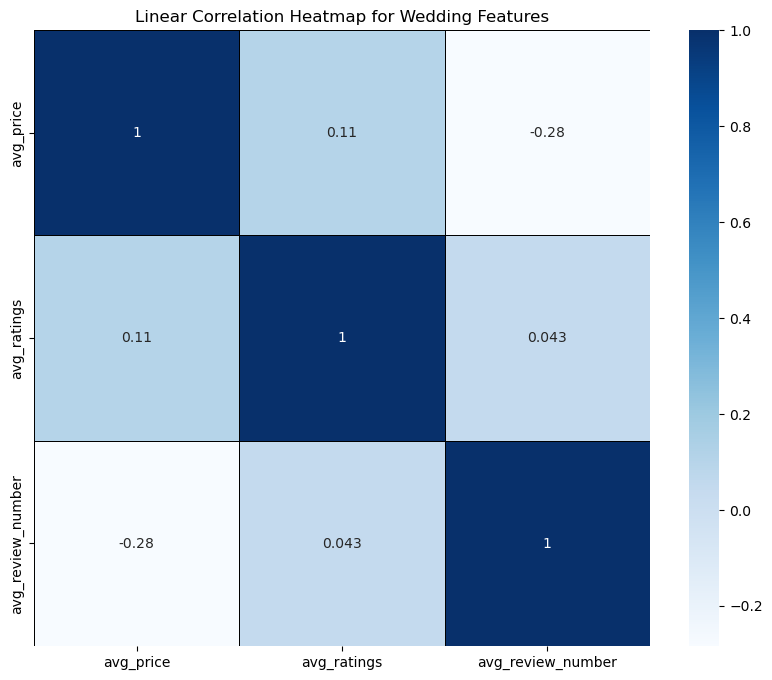

In [204]:
# Figure 2

#calculate correlation matrix for numerical variables : avg_price, avg_ratings, avg_review_numver, num_of_vendor.
num_columns =['avg_price', 'avg_ratings', 'avg_review_number']
correlation_matrx = wedding_df[num_columns].corr()

#size of the plot
plt.figure(figsize = (10,8))

# plot a heatmap of all numerical variables in wedding dataset
sns.heatmap(data = correlation_matrx,
           cmap = 'Blues', 
           square = True,
           annot = True, 
           linecolor = 'black', 
           linewidths = 0.5)

#formatting the plot (title)
plt.title ('Linear Correlation Heatmap for Wedding Features')

# display the heatmap
plt.show()

Furthering the analysis, a comparison of the average price to the number of vendors shows a small negative correlation, suggesting that less vendors offer services at higher price point. This suggest a market segment in the industry for expensive/premium services. 

Additionally, no correlation regarding whether an abundance of vendors affects customer ratings exist, indicating that higher vendor options does not lead to higher customer satisfaction. This suggest that other factor are most influencing regarding customer ratings, such as, for instance, service quality. 

These findings reinforce the assumption that neither price nor competition are the primary indicators of customer satisfaction. 

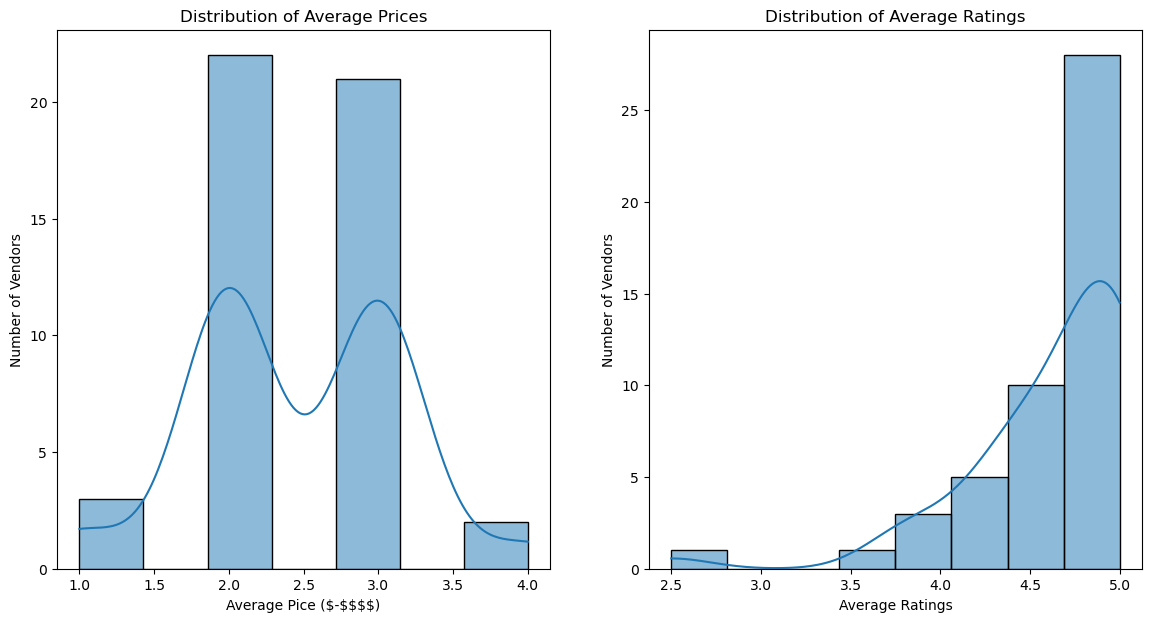

In [217]:
# Figure 3.1

#delving deeper into the number of vendors

#sizing the histplot
plt.figure(figsize = (14,7))

#histogram for avg_price and number of vendors
plt.subplot(1,2,1)
sns.histplot(data = wedding_df['avg_price'], 
             kde = True)
#formatting the plot (title, axis label)
plt.title('Distribution of Average Prices')
plt.ylabel('Number of Vendors')
plt.xlabel ('Average Pice ($-$$$$)')


# Figure 3.2

# histogram for avg_ratings and number of vendors
plt.subplot(1,2,2) # so they show next to each other
sns.histplot(data = wedding_df['avg_ratings'], 
             kde = True)
#formatting the plot(title, axis label)
plt.title('Distribution of Average Ratings')
plt.ylabel('Number of Vendors')
plt.xlabel ('Average Ratings')

#displaying both plots
plt.show()


The first graph shows that most businesses price their services mid-tier, suggesting that wedding vendors aim to attract customers looking for a balance between cost and quality.

The second histogram peaks at 5.0, indicating customers are generally highly satisfied with the services they receive and, thus, that vendors often meet clients' expectations.

By analyzing the number of vendors, the data shows that many vendors moderate prices but still maintain customer satisfaction. For businesses, it's important to set prices that match what the couples expect to pay. Since customers want to know they'll get excellent service at a reasonable price, vendors should price their services within the market expectations, so that customers can expect to find high-quality services at mid-range prices.

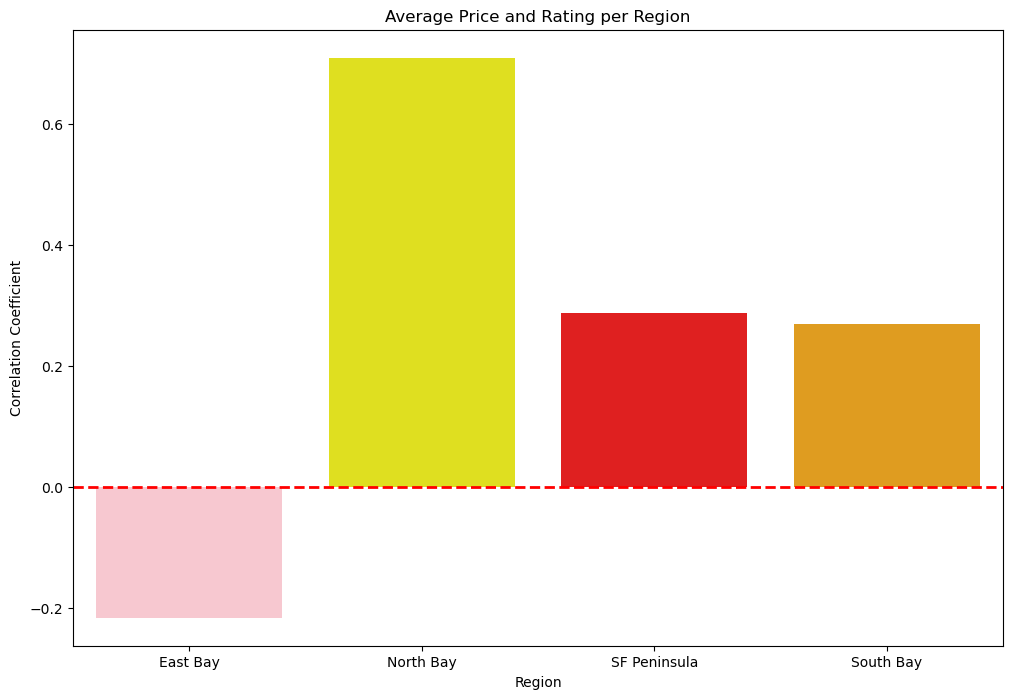

In [203]:
# Figure 4: 

# Function to calculate correlation on a group,'location' to analyze per region 
def region_corr(location):
    return location['avg_price'].corr(location['avg_ratings'])

# Group by region (done on SQL) and apply region_corr
corr_values = wedding_df.groupby('region').apply(region_corr)

corr_values = corr_values.reset_index() 

#custom color palette - so it's the same in all visual data
custom_color = ['pink', # Pink - East Bay
               'yellow',  # Yellow - North Bay
               'red',  # Red - SF Peninsula
               'orange']  # Orange - South Bay

# Size of bar chart
plt.figure (figsize = (12,8))

# barplot data
bar_chart = sns.barplot (x = 'region', 
                        y = 0, 
                        data = corr_values, 
                        palette = custom_color)

# add a horizontal line at y=o, to show when correlation goes in negative
plt.axhline (y = 0, 
            color = 'red',
            linestyle = '--',
             linewidth = 2)

# formatting and displaying the plot
plt.title ('Average Price and Rating per Region')
plt.xlabel('Region')
plt.ylabel('Correlation Coefficient')

# displaying the plot
plt.show()

Zooming in on the regional differences, in the hope of finding relevant insights, the data showed a positive correlation between pricing and satisfaction for the North Bay. This means that customers in the North Bay region, such as Napa, Sonoma, and Santa Rosa - which are renowned for their premium wedding venues - often rate vendors with high prices higher—hinting that in regions well known for their wedding location, customers perceive higher-priced services as more satisfactory, possibly due to the location, the reputation of the vendors, and other factors.

A weaker correlation was demonstrated for the East Bat, suggesting that price is not a significant component of customer satisfaction in that area—implying that other factors, such as the quality of service and fulfillment of the couple’s expectations, might play a more determinant role in customer ratings.

Overall, this regional breakdown analysis highlights that the importance customers place on price and satisfaction varies across regions, which is helpful as it informs vendors that ‘strategies’ should be created and tailored regional since what works in one area in terms of pricing and customer satisfaction does not work as well in another area.  

**Insights:**


**1. Service Quality Over Pricing**  
Vendors should prioritize service quality, meaning investing in customer experience from the initial contact until the service's completion, without increasing pricing. Indeed, the analysis shows an average rating of around 4.5 (Figure 2), indicating a high level of customer satisfaction regardless of price, suggesting that vendors prioritizing service quality tend to achieve higher levels of customer satisfaction (Chen, Hsu, & Lee, 2019). High-quality service increases satisfaction and, thus, the number of positive reviews essential in the wedding industry, especially on platforms such as TheKnot.com. 

**2. Customization of Services per Region**   
The analysis suggests regional variances in how price impacts satisfaction. North Bay shows a strong correlation between price and ratings exists (Figure 4), suggesting that customers may have higher expectations and are willing to invest more in wedding services. This inclination could be due to affluence, competition, or potentially linked to destination weddings as the region encompasses Napa, a notorious county for wineries and wedding venues. Oppositely, regions like East Bay and South Bay exhibit weak or no correlations, underscoring that price isn't the primary driver of satisfaction. These findings highlight that wedding vendors should tailor their pricing strategies to regional expectations. In luxury destinations, vendors can afford to price higher while emphasizing the area's location and desirability aspect, whereas in areas like East Bay, competitive pricing with a focus on service excellence may be more effective (Gluck et al., 2022).

                                              References: 
                                              
Chen Chen, M. C., Hsu, C. L., & Lee, L. H. (2019). Service Quality and CUstomer Satisfaction in Pharmaceutical Logistics: An Analysis Based on Kano Model and Importance-Satisfaction Model. International Jounral of Environmental Research and Public Health, 16(21), 4091. Retrieved December 14th, 2023 from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6862144/

Gluck, F. W., Kaufman, S. P., & Walleck, A. S. (2022). Strategic Management for Competitive Advantage. Harvard Business Review. Retrieve December 13th, 2023, from https://hbr.org/1980/07/strategic-management-for-competitive-advantage

Merriam-Webster Dictionary. (2019). Merriam-Webster Dictionary. Retrieved from Merriam-webster.com website: https://www.merriam-webster.com/dictionary

MyBib. (2018b, July 13). MyBib – A New FREE APA, MLA, Harvard Bibliography Generator. Retrieved from MyBib.com website: https://www.mybib.com/

Wedding Venues in San Francisco, CA. (2023). Retrieved December 15, 2023, from theknot.com website: https://www.theknot.com/marketplace/wedding-reception-venues-san-francisco-ca?sort=featured

